# Enron POI Machine Learning Project

## Question 1

**Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it.** 

The goal of this project is to use the information in the supplied dataset to predict whether or not a particular person is a person of interest (POI), where interest is legal interest (if you get my drift).  Machine learning can be used to process the features and then classify the data as POI/non-POI, using any one of a number of well-known machine learning algorithms.


**As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]**

The data contains a relatively large number of features and very few data points (for a machine learning problem).  Many of the features look noisy or not very useful in predicting POI status. 

Cleaning up the data and reducing the number of features is going to be key to getting good results. Since we have to get both a training and testing data from this small dataset, cross-validation is used.

Please note that this data is not normally distributed nor expected to be.  If you look at the distribution histograms, you'll see many of the features have a pareto type of distribution.  If you exclude these outliers, you could be getting rid of some of your most important information.

See [Cleaning the data and finding outliers](#cleaning-data) for details.


## Question 2
**What features did you end up using in your POI identifier, and what selection process did you use to pick them?**

I compiled an initial set of features  based on a combination of correlation to POI status, visualization, kbest results and intuition. 

See [Feature selection](#feature-selection) for more details.  

Then, starting with this set, I commented each feature out in turn to see if it improved the results.  Finally, I commented them out in combinations to see if I could get further improvement.  In this way, I was able to derive the best feature set for each type of classifier.

Possible problems w/ this approach are if some of the features I omitted as less significant (in the initial list) would have improved the result, or possible human error in trying different feature combinations, since it was done by hand.  

Despite these potential problems, I was able to pass the tester.py test for several different classifiers using this method of feature selection.

Note: I used this until Random Forest.  Then I lost patience and tried the linear models with the feature sets I had already derived.  


**Did you have to do any scaling? Why or why not?** 

I got good results from Naive Bayes and Decision Tree, which don't require scaling.

I did use scaling with Logistic Regression and SVC. SVC requires scaling because of the metric used to calculate distance to the separation hyperplane.  I wasn't sure about Logistic Regression and used the scaling just to be certain--it can never hurt to use it. 

For scalers, I tried MinMaxScaler and RobustScaler and there didn't seem to be much difference between the two, so I settled on RobustScaler.


See [Support vector machine](#svc) and [Logistic regression](#logistic-regression) for more details


**As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.)** 

I normalized the messages_to_poi and messages_from_poi by the total number of messages_to or from.  I then dropped the non-normalized values.

See [Engineering new features](#new-features) for details.


**In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]**

I did not use automated feature selection directly but did use it as one of the factors in my manual feature selection (see [Feature selection](#feature-selection). 

For feature importances for Decision Tree and Random Forest, see [Decision Tree Classifier](#decision-tree) and [Random Forest Classifier](#random-forest), below.



## Question 3

**What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]**

I started with Naive Bayes, because it is a good, general-purpose classifier.  I found the best feature set for that one and pickled the result.  See [Naive Bayes](#naive-bayes) for more information.  

Then, I tried Decision Tree and was able to get good results by narrowing the feature set to three features.  See [Decision tree](#decision-tree) for results.

The narrow feature set and having to set max_samples_split to 2 (see below) make me suspicious that this solution is overfitting. Which is a bit of a subtle point. If this dataset is all the Enron data that there is (which I suppose it is) and the problem is to get the best fit to it, then this seems like another good solution.  But if the idea is to find patterns that might extent to other, hypothetical Enron data, I think the more broad-based set of features that produces reliable results by several algorithms is the better bet.

So I tried  going back to the GaussianNB feature set and using a better version of decision tree: Random Forest, with the same feature set I used for GaussianNB.  It looked promising at first, but tweaking  the first try--increasing the number of trees brought it over the top, and--after tweaking the number of trees and the max_samples_split,  that is still the solution I like best.  It takes a while to run but on such a small dataset, it is not too bad (a coffee break).

In the hypothetical case that we had more Enron data to test on, I think this one might perform the best.  I pickled it also. Details are in [Random Forest](#random-forest).

If performance on the current Enron data is the metric, then the decision tree solution is the best one so far.

I tried scaling/SVC, but was not able to get good separation between POI and non-POI.  Either recall or precision suffered. I did not tweak the feature set too much, since results this bad for SVC using a large feature set should not improve by limiting features (in practice they did, a little).  See [Support Vector Machine](#svc), below.  I did try large C and gamma to improve the fit and even tried a few kernels for the SVM.  It just didn't look as promising so I didn't pursue it. I do think I could have come up with something that passed eventually, but not sure I would trust it so much (on hypothetical unseen Enron data).

It was a bit harder to get good results using the linear methods. Either precision was low (a lot of non-POI ended up in the net) or recall was low (only netted a few of the available POI). So, however you drew the hyperplane, there were a lot of points of the wrong type on one side or the other side of it. 

I was able to get a good result using Logistic Regression and the same small featureset I used for decision tree.  But, I'm not sure I trust these results any more than I trusted decision tree.  That's why in the end, the Naive Bayes solution is the one that I chose to pickle for this assignment.


**What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]**

GaussianNB does not have any hyperparameters that I could see.

For the DecisionTree classifier, I tweaked the max_samples_split parameter.  This is an indicator of the node size where the decision tree quits trying to further split the data.  I used GridSearchCV to determine the best value for this, using the precision and recall as score.  This lead me to choose max_sample_size=2, which is suggests we may be overfitting the data slightly.  But to get good scores with any of the classifiers (except Naive Bayes), I ended up having to tune the parameters in the direction of overfitting.   

For RandomForest, I tweaked the number of trees and  max_samples_split. A larger number of trees improves the result, but takes much longer to run.  The max_sample_split hyperparameter is similar to decision trees.

For the Logistic Regression, I tried a high C. Raising the regularization parameter means that you  increase the complexity of the model to classify more points correctly.  So, like the decision tree, you get good results but at the risk of overfitting.  


**What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]
Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

Validation is when you take the model that you trained using your training data, and you run it on your testing data to see how well it does.  The classic mistake is that you must _never train on your testing data_.  Doing so polutes your testing data, because once you use it for training (even indirectly), the testing data is no longer a good test for your model, since you may have inadvertently overfit to it.

I used the supplied `test_classifier` function to test each of the classifiers. This function does a StratifiedShuffleSplit cross validation using the classifier and feature set that you give it and prints out the accuracy, precision, recall, and other statistics.  Cross validation is a good way to make the most of a small dataset such as this one.  You partition the data n ways and then reserve one piece for testing.  Then you do this for every piece and average the results.  It's a way to use all of your data for both training and testing (tricky) because you never use them together in the same step--you just average the result of the steps.

Our evaluation metrics are accuracy, precision, and recall. Most of the classifiers have high accuracy, since most records are not POI.  Even if you identified all records as non-POI, you would be right most of the time.  The tradeoff that we see, especially in the linear models, is on precision vs. recall.  

The precision is the number of true positives divided by the total number of records identified as positive (true positive + false positive). So it is a measure of the fraction of the records classed as POI that actually are POI.  

On the other hand, recall is the number of true positives divided by the total number of positive records in your dataset (true positives + false negatives).  It is a measure of how good your classifer is at netting the maximum number of POI.

If you are using a hyperplane to separate POI and non-POI when they are not cleanly separable, you can see that if you move the hyperplane to increase recall (get more of the available POI) you will end up lowering the precision (by mixing in a higher proportion of non-POI).

In the end, by customizing the featureset and tuning the parameters (where available) I got four of the classifiers to pass the test.  Three of them passed with over .4 in precision and recall.  

Here are the results:

`GaussianNB()
	Accuracy: 0.85550	Precision: 0.49275	Recall: 0.39100	F1: 0.43602	F2: 0.40784
	Total predictions: 14000	True positives:  782	False positives:  805	False negatives: 121True negatives: 11195`
    
So in this solution, the set of records classified as POI is 49% POI.  And 39% of all the POI are found.  Yes, even our best classifiers are not very good!

`DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.81236	Precision: 0.48167	Recall: 0.42050	F1: 0.44901	F2: 0.43146
	Total predictions: 11000	True positives:  841	False positives:  905	False negatives: 115True negatives: 8095`
    
This classifier has similar results.  The set of records classified as POI is 48% POI.  And it finds 42% of all POI.

`RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85038	Precision: 0.52256	Recall: 0.31850	F1: 0.39578	F2: 0.34548
	Total predictions: 13000	True positives:  637	False positives:  582	False negatives: 136True negatives: 10418`
    
This solution finds a purer set of POI (52% true POI), but at the cost of finding fewer of the available POI (only 31%). 

`Pipeline(steps=[('scaler', RobustScaler(copy=True, with_centering=True, with_scaling=True)), ('clf', LogisticRegression(C=100, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
	Accuracy: 0.76591	Precision: 0.40887	Recall: 0.64500	F1: 0.50048	F2: 0.57822
	Total predictions: 11000	True positives: 1290	False positives: 1865	False negatives:  71True negatives: 7135`
    
This solution errs in the other directiron. It finds more of the available POI, but at the cost of mixing in a higher proportion of non-POI.  The group classfied as POI is only about 40% POI.  But it does find 65% of the available POI.  

So, if  you want to maximize your recall, then Logistic Regression is the best method to use.  Also, it is blazing fast!



## Prep work

In [1]:
# Imports and settings for pandas, stats, plotting, pipelines.
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import math
import statsmodels.api as sm

from sklearn.pipeline import Pipeline



In [2]:
# Imports and settings for code supplied w/ this exercise.

import sys
import pickle
sys.path.append("../tools/")

from sklearn.cross_validation import StratifiedShuffleSplit

from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data

# Load data into dict

with open("final_project_dataset.pkl", "r") as data_infile:
        data_dict = pickle.load(data_infile)

# Convert dict to dataframe
df = pd.DataFrame.from_dict(data_dict)

# Transpose dataframe
df = df.transpose()


In [3]:
df.head()



,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

I tried everything to coerece this data into the proper form.  What worked in the end was to write to CSV and then read it.  Ugh.

In [5]:
df.to_csv('enron_data.csv')
df = pd.read_csv('enron_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
Unnamed: 0                   146 non-null object
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt

Notice that the loan_advances field is present in only 4 records.  I'm not going to drop it, since it could still have useful info, but will view it with some skepticism.


## Cleaning the data and finding outliers <a name="cleaning-data"></a>


Let's start out with a visual inspection of the data.

Then, we'll need to do the following analysis:

   * Figure out how to deal with all the NANs
   * Find outliers and exclude where needed.

### Deal with NANs

There are lots of NANs in the data, and looking at the PDF, it looks as if most of them should be 0.

In [6]:
df = df.fillna(0)

This messes up the email column, but we're going to drop that column anyway.  Let's drop it now.

In [7]:
df = df.drop("email_address", 1)

### Find outliers

In [8]:
df[~(np.abs(df.bonus-df.bonus.mean())<(3*df.bonus.std()))]

,Unnamed: 0,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
130,TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,311764000.0,5235198.0,0.0,0.0,0.0,...,48521928.0,42667589.0,False,130322299.0,-7576788.0,26704229.0,0.0,0.0,309886585.0,434509511.0


Whoa!  Total is not a person.  Looking at the PDF, this is the line for the total of all payments.  So, we drop that, too.

In [9]:
df = df.drop(130)
df[~(np.abs(df.bonus-df.bonus.mean())<(3*df.bonus.std()))]


,Unnamed: 0,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
7,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,0.0,953136.0,17355.0,484.0,228.0,108.0,...,0.0,210698.0,True,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
78,LAVORATO JOHN J,8000000.0,0.0,0.0,0.0,4158995.0,49537.0,2585.0,528.0,411.0,...,2035380.0,1552.0,False,1008149.0,0.0,339288.0,3962.0,7259.0,10425757.0,5167144.0
79,LAY KENNETH L,7000000.0,202911.0,-300000.0,0.0,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,True,14761694.0,0.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0
122,SKILLING JEFFREY K,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,True,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0


Now, we get a more sensible list.  I don't see any reason to exclude these people, so I'm leaving them.  Let's look at a few more columns for outliers.

In [10]:
df[~(np.abs(df.deferral_payments-df.deferral_payments.mean())<(3*df.deferral_payments.std()))]

,Unnamed: 0,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,0.0,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
47,FREVERT MARK A,2000000.0,6426990.0,-3367011.0,0.0,10433518.0,86987.0,21.0,242.0,6.0,...,1617011.0,7427621.0,False,4188667.0,0.0,1060932.0,2979.0,3275.0,17252530.0,14622185.0
66,HORTON STANLEY C,0.0,3131860.0,0.0,0.0,5210569.0,0.0,1073.0,44.0,15.0,...,0.0,0.0,False,2046079.0,0.0,0.0,1074.0,2350.0,3131860.0,7256648.0
68,HUMPHREY GENE E,0.0,2964506.0,0.0,0.0,2282768.0,4994.0,17.0,10.0,17.0,...,0.0,0.0,False,0.0,0.0,130724.0,119.0,128.0,3100224.0,2282768.0


In [11]:
df[~(np.abs(df.exercised_stock_options-df.deferral_payments.mean())<(3*df.exercised_stock_options.std()))]

,Unnamed: 0,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
65,HIRKO JOSEPH,0.0,10259.0,0.0,0.0,30766064.0,77978.0,0.0,0.0,0.0,...,0.0,2856.0,True,0.0,0.0,0.0,0.0,0.0,91093.0,30766064.0
79,LAY KENNETH L,7000000.0,202911.0,-300000.0,0.0,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,True,14761694.0,0.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0
103,PAI LOU L,1000000.0,0.0,0.0,0.0,15364167.0,32047.0,0.0,0.0,0.0,...,0.0,1829457.0,False,8453763.0,0.0,261879.0,0.0,0.0,3123383.0,23817930.0
112,RICE KENNETH D,1750000.0,0.0,-3504386.0,0.0,19794175.0,46950.0,18.0,42.0,4.0,...,1617011.0,174839.0,True,2748364.0,0.0,420636.0,864.0,905.0,505050.0,22542539.0
122,SKILLING JEFFREY K,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,True,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0


Again, I see no reason to exclude any of these because the data is not normally distributed nor expected to be.  If you look at the distribution histograms, you'll see many of the features have a pareto type of distribution.  If you exclude these outliers, you could be getting rid of some of your most important information.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119872c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c7e6650>]], dtype=object)

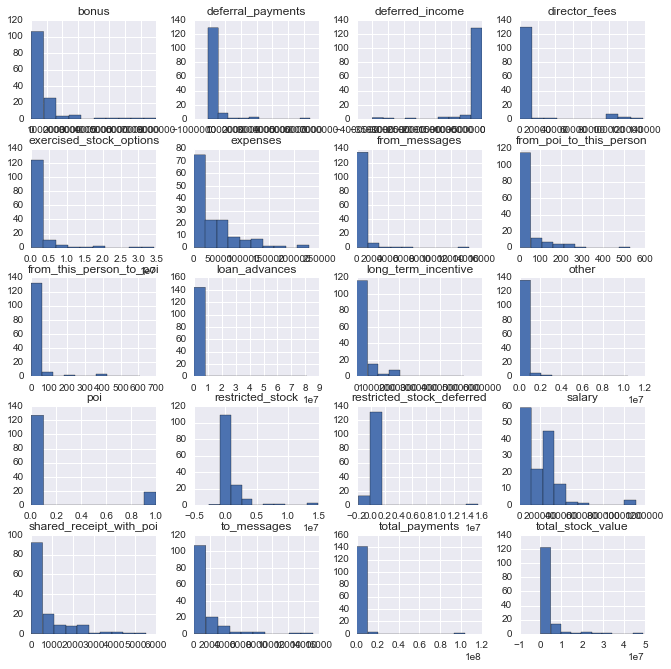

In [12]:
df.hist(figsize=(11,11))

#### Manual examination of the data and PDF

With such a small dataset, we have to make sure the data is aboslutely clean, so I examined the dataframe and compared it to the pdf.  I found the following problems:

   * LOCKHART EUGENE E has no data
   * THE TRAVEL AGENCY IN THE PARK not a person
   
So , I'll remove those two entries.

In [13]:
df[df["Unnamed: 0"]=="LOCKHART EUGENE E"]


,Unnamed: 0,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
84,LOCKHART EUGENE E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df = df.drop(84)

In [15]:
df[df["Unnamed: 0"]=="LOCKHART EUGENE E"]


,Unnamed: 0,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value


In [16]:
df[df["Unnamed: 0"]=="THE TRAVEL AGENCY IN THE PARK"]


,Unnamed: 0,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
127,THE TRAVEL AGENCY IN THE PARK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,362096.0,False,0.0,0.0,0.0,0.0,0.0,362096.0,0.0


In [17]:
df = df.drop(127)

In [18]:
df[df["Unnamed: 0"]=="THE TRAVEL AGENCY IN THE PARK"]



,Unnamed: 0,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value


## Engineering new features <a name="new-features"></a>

### Engineer features

Now, it's time to look at our feature set.  First, let's look at the features themselves and see if they make sense. The emails to and from POI fields are important, but could be improved by being normalized.  Let's add the normalized versions and see if it improves the correleation.  

In [19]:
df["normalized_from_poi"] = df["from_poi_to_this_person"]/df["to_messages"]
df["normalized_to_poi"] = df["from_this_person_to_poi"]/df["from_messages"]

df.head()



,Unnamed: 0,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,normalized_from_poi,normalized_to_poi
0,ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,0.0,1729541.0,13868.0,2195.0,47.0,65.0,...,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,0.016196,0.029613
1,BADUM JAMES P,0.0,178980.0,0.0,0.0,257817.0,3486.0,0.0,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0,NaN,NaN
2,BANNANTINE JAMES M,0.0,0.0,-5104.0,0.0,4046157.0,56301.0,29.0,39.0,0.0,...,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,0.068905,0.000000
3,BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,...,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0,NaN,NaN
4,BAY FRANKLIN R,400000.0,260455.0,-201641.0,0.0,0.0,129142.0,0.0,0.0,0.0,...,False,145796.0,-82782.0,239671.0,0.0,0.0,827696.0,63014.0,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 145
Data columns (total 23 columns):
Unnamed: 0                   143 non-null object
bonus                        143 non-null float64
deferral_payments            143 non-null float64
deferred_income              143 non-null float64
director_fees                143 non-null float64
exercised_stock_options      143 non-null float64
expenses                     143 non-null float64
from_messages                143 non-null float64
from_poi_to_this_person      143 non-null float64
from_this_person_to_poi      143 non-null float64
loan_advances                143 non-null float64
long_term_incentive          143 non-null float64
other                        143 non-null float64
poi                          143 non-null bool
restricted_stock             143 non-null float64
restricted_stock_deferred    143 non-null float64
salary                       143 non-null float64
shared_receipt_with_poi      143 non-null float64

In [21]:
df = df.fillna(value=0)

In [22]:
df.corr()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,normalized_from_poi,normalized_to_poi
bonus,1.000000,0.173795,-0.330985,-0.177496,0.415811,0.243870,0.173856,0.640414,0.448153,0.432525,...,0.358486,0.423035,-0.043467,0.648715,0.664331,0.519053,0.559531,0.460646,0.194670,0.262181
deferral_payments,0.173795,1.000000,-0.543115,-0.095386,0.117192,-0.021808,0.028636,0.216426,0.001735,0.014509,...,-0.039880,0.087805,-0.030513,0.242486,0.209636,0.123716,0.141078,0.118235,0.118040,0.133469
deferred_income,-0.330985,-0.543115,1.000000,0.076548,-0.268070,-0.039982,-0.014286,-0.194299,-0.004300,-0.025184,...,-0.274150,-0.125644,0.047988,-0.329262,-0.235745,-0.120988,-0.103456,-0.244238,-0.112510,-0.152794
director_fees,-0.177496,-0.095386,0.076548,1.000000,-0.117222,-0.139616,-0.080397,-0.168933,-0.099484,-0.027745,...,-0.121886,-0.178332,0.346195,-0.305364,-0.197962,-0.170877,-0.026504,-0.147440,-0.201643,-0.185731
exercised_stock_options,0.415811,0.117192,-0.268070,-0.117222,1.000000,0.120587,-0.024108,0.124576,0.001731,0.568214,...,0.386853,0.586937,-0.002355,0.448741,0.124863,0.084378,0.598725,0.963874,0.022742,0.107998
expenses,0.243870,-0.021808,-0.039982,-0.139616,0.120587,1.000000,0.154841,0.145819,0.133273,0.121469,...,0.203545,0.179563,-0.067996,0.358144,0.285369,0.241276,0.150690,0.151498,0.090275,0.067795
from_messages,0.173856,0.028636,-0.014286,-0.080397,-0.024108,0.154841,1.000000,0.253123,0.609380,-0.019674,...,-0.034671,0.022155,-0.022501,0.142860,0.300856,0.507879,0.008647,-0.012110,-0.004866,-0.058400
from_poi_to_this_person,0.640414,0.216426,-0.194299,-0.168933,0.124576,0.145819,0.253123,1.000000,0.497489,0.100406,...,0.189352,0.124608,-0.046906,0.405545,0.732441,0.617709,0.215305,0.136516,0.583121,0.257314
from_this_person_to_poi,0.448153,0.001735,-0.004300,-0.099484,0.001731,0.133273,0.609380,0.497489,1.000000,-0.009869,...,0.128908,0.058918,-0.022398,0.205624,0.524254,0.604958,0.061689,0.021073,0.085426,0.083273
loan_advances,0.432525,0.014509,-0.025184,-0.027745,0.568214,0.121469,-0.019674,0.100406,-0.009869,1.000000,...,0.220183,0.581424,-0.004905,0.388443,0.137236,0.115394,0.964305,0.630284,0.016459,0.152498


These seem completely changed, which is wacky, but undelying data seems OK and the correlations don't mean much so I proceed. (Any idea why this is happening appreciated!)

In [23]:
df = df.drop("from_poi_to_this_person", 1)


In [24]:
df = df.drop("from_this_person_to_poi",1)


## Examining the data for feature selection

In [25]:
df.head()

,Unnamed: 0,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,loan_advances,long_term_incentive,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,normalized_from_poi,normalized_to_poi
0,ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,0.0,1729541.0,13868.0,2195.0,0.0,304805.0,...,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,0.016196,0.029613
1,BADUM JAMES P,0.0,178980.0,0.0,0.0,257817.0,3486.0,0.0,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0,0.000000,0.000000
2,BANNANTINE JAMES M,0.0,0.0,-5104.0,0.0,4046157.0,56301.0,29.0,0.0,0.0,...,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,0.068905,0.000000
3,BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,0.0,1586055.0,...,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0,0.000000,0.000000
4,BAY FRANKLIN R,400000.0,260455.0,-201641.0,0.0,0.0,129142.0,0.0,0.0,0.0,...,False,145796.0,-82782.0,239671.0,0.0,0.0,827696.0,63014.0,0.000000,0.000000


In [26]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,normalized_from_poi,normalized_to_poi
count,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,1.430000e+02,143.000000,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,1.430000e+02,1.430000e+02,143.000000,143.000000
mean,6.807246e+05,2.236426e+05,-1.950377e+05,10050.111888,2.090318e+06,35622.720280,366.125874,5.868881e+05,3.393142e+05,2.968067e+05,8.746100e+05,7.393131e+04,1.867429e+05,707.524476,1247.216783,2.272323e+06,2.930134e+06,0.022831,0.110691
std,1.236180e+06,7.565208e+05,6.079225e+05,31399.349067,4.809193e+06,45370.869604,1455.452279,6.818177e+06,6.890139e+05,1.135031e+06,2.022338e+06,1.306545e+06,1.971171e+05,1079.457016,2243.006069,8.876252e+06,6.205937e+06,0.036495,0.186359
min,0.000000e+00,-1.025000e+05,-3.504386e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-1.787380e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,-3.750600e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.827650e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,9.679650e+04,2.549360e+05,0.000000,0.000000
50%,3.000000e+05,0.000000e+00,0.000000e+00,0.000000,6.087500e+05,21530.000000,18.000000,0.000000e+00,0.000000e+00,9.470000e+02,3.605280e+05,0.000000e+00,2.106920e+05,114.000000,383.000000,9.665220e+05,9.760370e+05,0.005018,0.000000
75%,8.000000e+05,9.110000e+03,0.000000e+00,0.000000,1.698900e+06,53534.500000,54.000000,0.000000e+00,3.748255e+05,1.492040e+05,7.759920e+05,0.000000e+00,2.702590e+05,967.500000,1639.000000,1.956978e+06,2.307584e+06,0.030020,0.199218
max,8.000000e+06,6.426990e+06,0.000000e+00,137864.000000,3.434838e+07,228763.000000,14368.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,1.545629e+07,1.111258e+06,5521.000000,15149.000000,1.035598e+08,4.911008e+07,0.217341,1.000000


Not sure how to get rid of that pesky scientific notation.  Suggestions appreciated!

In [27]:
full_features = list(df)[1:]
full_features

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'normalized_from_poi',
 'normalized_to_poi']

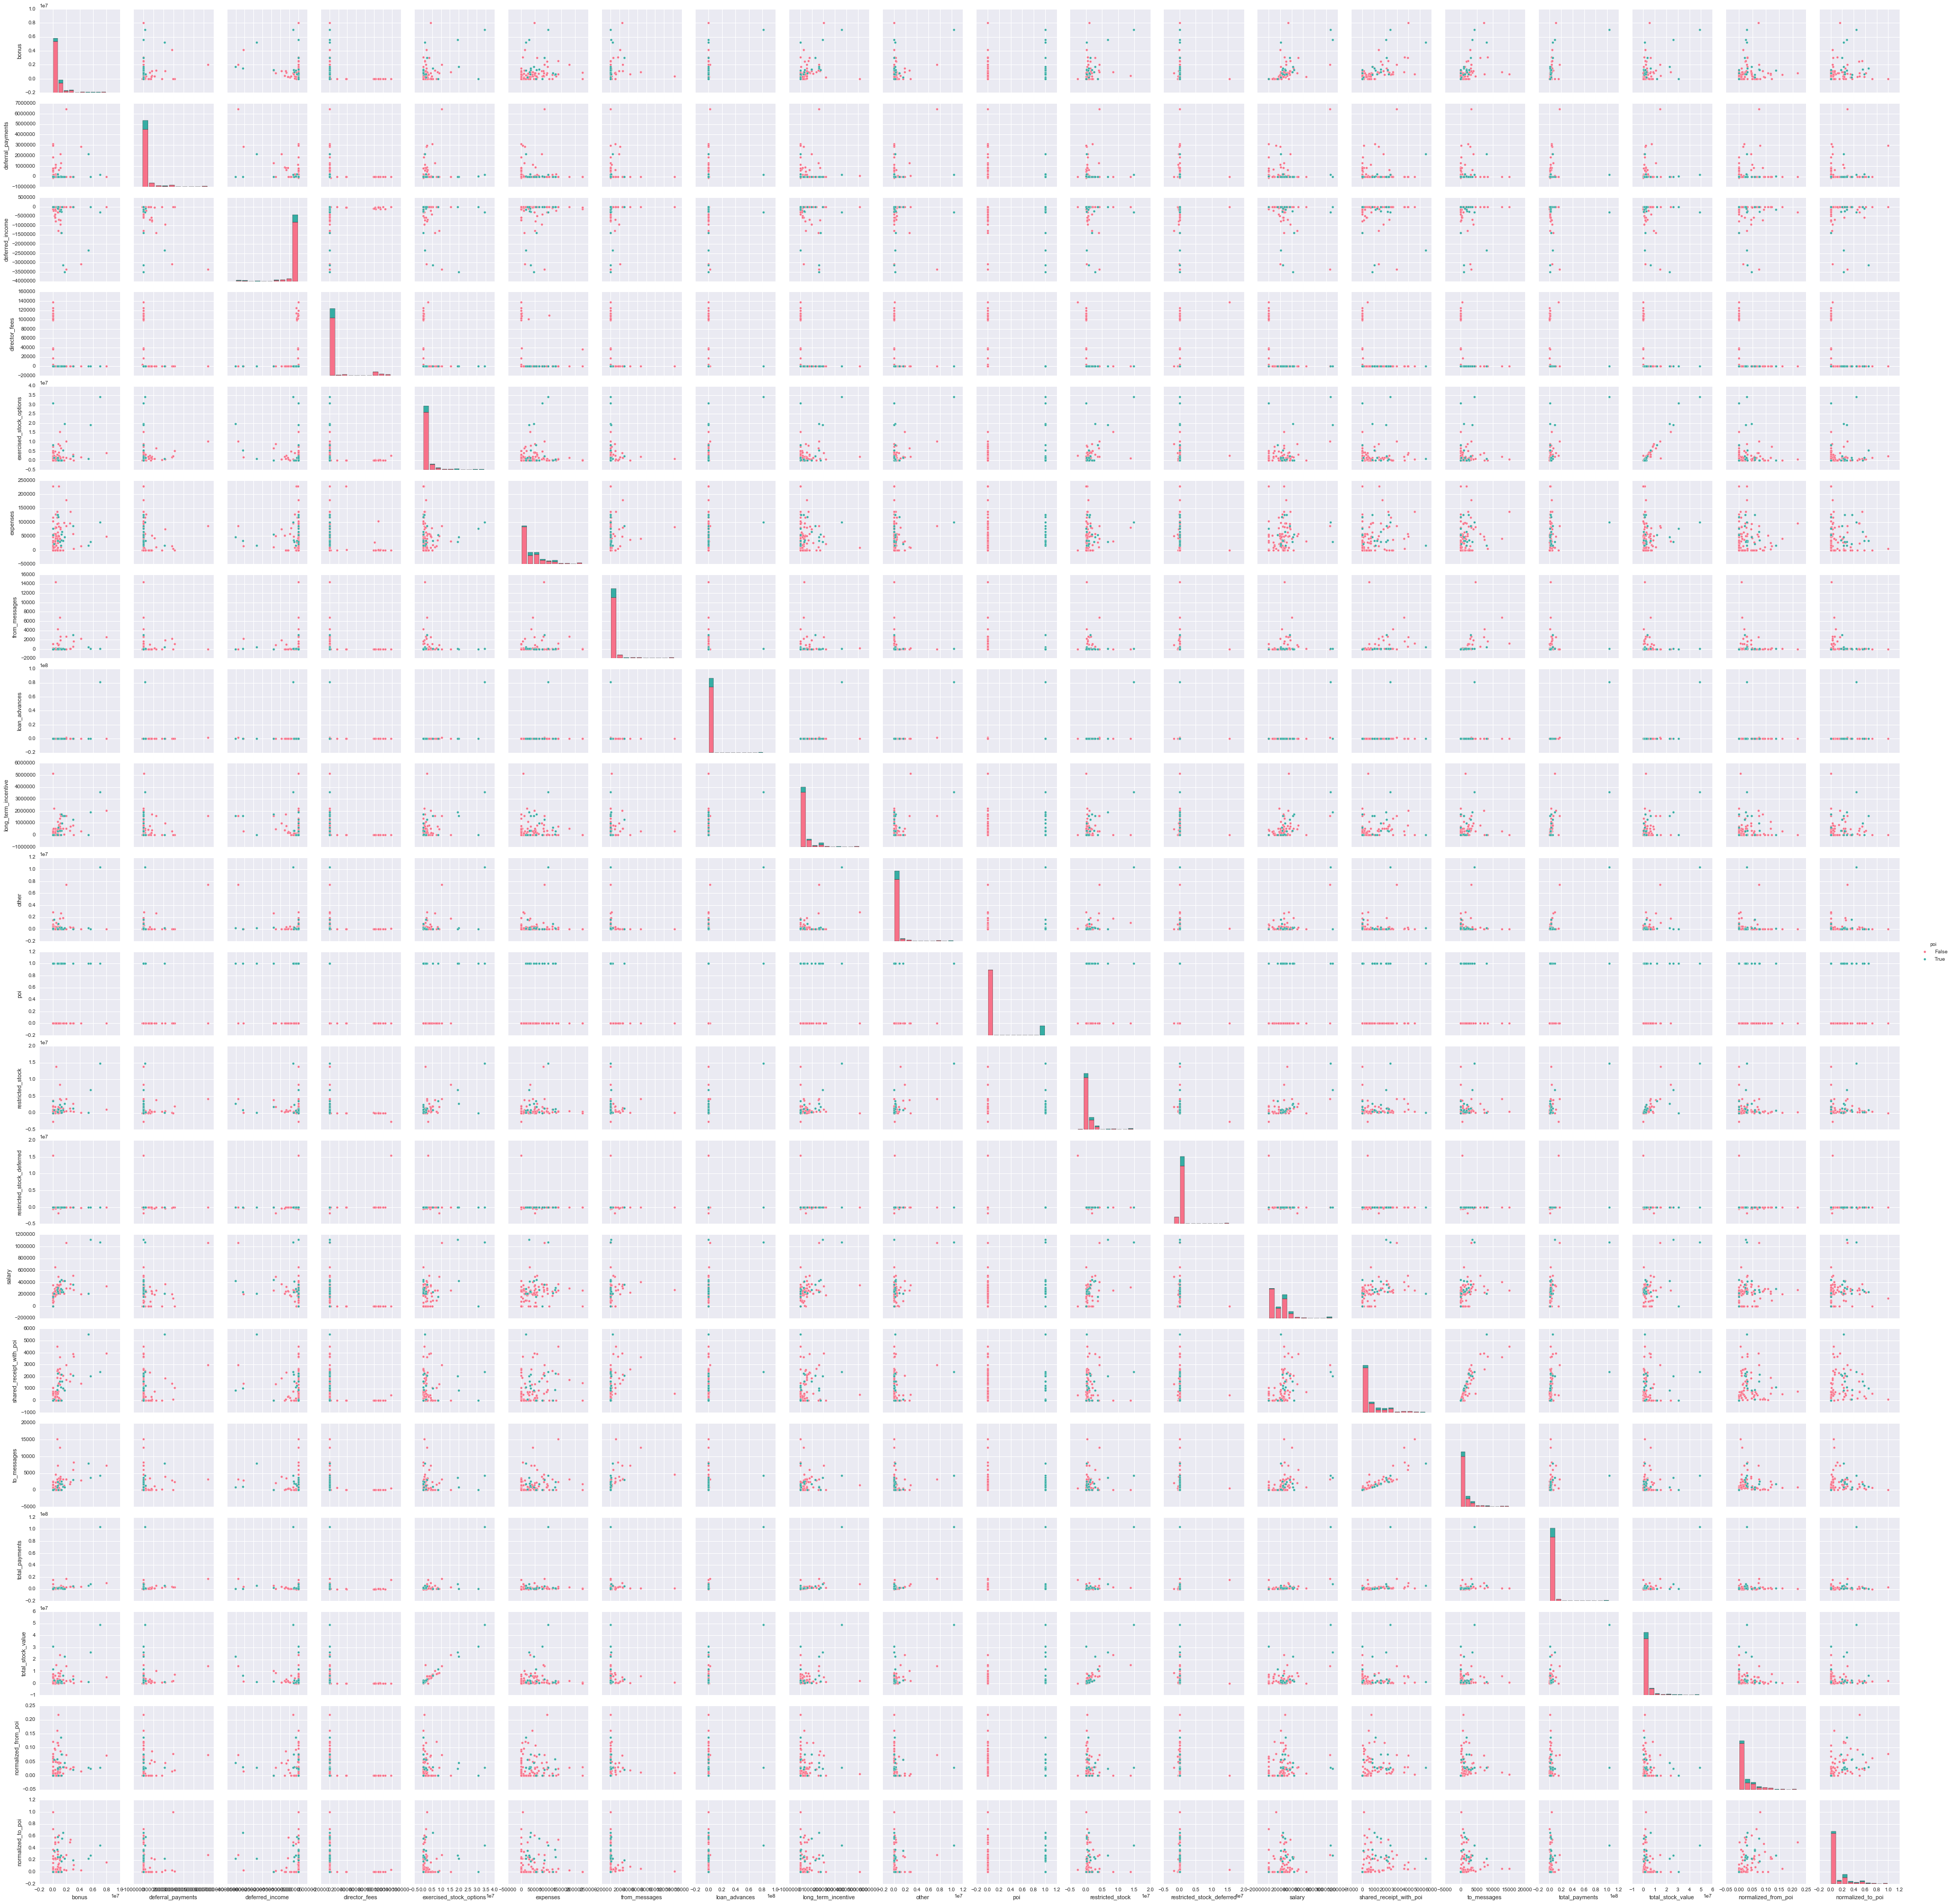

In [28]:
sns.pairplot(df, 
            # vars=["bonus", "salary", 'exercised_stock_options', 'shared_receipt_with_poi'], 
             hue='poi', 
             palette='husl')

## Feature selection <a name="feature-selection"></a>

### Correlation

In [29]:
df.corr()[[10]].sort_values(by='poi', ascending=False)

,poi
poi,1.000000
exercised_stock_options,0.386853
total_stock_value,0.382623
bonus,0.358486
salary,0.338851
normalized_to_poi,0.322875
long_term_incentive,0.256405
restricted_stock,0.247652
total_payments,0.242020
shared_receipt_with_poi,0.239625


So, things that seem correlated (> 30%) are:
   * bonus
   * exercised_stock_options
   * salary
   * total_stock_value
   
Over 25%:
   * deferred_income
   * long_term_incentive
   
Over 20%:
   * expenses
   * loan_advances
   * restricted_stock
   * shared_receipt_with_poi
   * total_payments

Of course, these are single variable correlations for non-normal data and are of limited utility.



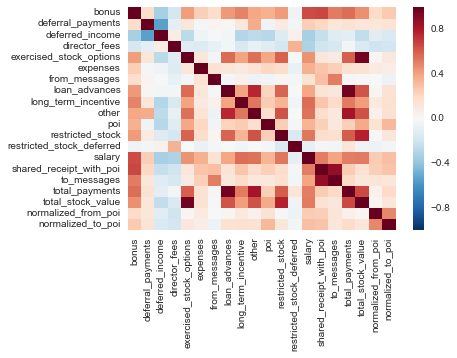

In [30]:
sns.heatmap(df.corr())

Looking at things that are correlated w/ poi,  

total_stock_value and exercised_stock_options are highly correlated, so we'll use only one fo them 


This leaves the following feature list to use:
   * bonus
   * exercised_stock_options
   * salary
   * total_payments
   * deferred_income
   * long_term_incentive
   * expenses
   * loan_advances
   * restricted_stock
   * shared_receipt_with_poi
   
 We also have the two non-financial features, so we should probably pick at least one to toss in the pot:
 
    * normalized from poi
    * normalized to poi
    
So, here is our first attempt at a feature list, with 12 features.

In [31]:
features_list1 = ['poi',
                 'salary', 
                 'bonus', 
                 'exercised_stock_options',
                 'total_payments',
                 'deferred_income', 
                 'long_term_incentive',
                 'expenses',
                 'loan_advances',
                 'restricted_stock',
                 'shared_receipt_with_poi',
                 'normalized_from_poi',
                 'normalized_to_poi'
                 ] 

### Select K best

I'm using this mostly as a sanity check on my original list.  

## Trying the classifiers

In [32]:
full_feature_list = ['poi',
                'bonus',
                'deferral_payments',
                'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'normalized_from_poi']


In [33]:
# Put dataframe back into a dict
my_dataset = df.transpose().to_dict()
all_data = featureFormat(my_dataset, full_feature_list, sort_keys = True)
alllabels, allfeatures = targetFeatureSplit(all_data)

In [34]:

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler, RobustScaler

data = featureFormat(my_dataset, full_feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

scaler = RobustScaler()
allfeatures = scaler.fit_transform(allfeatures)

selector = SelectKBest(k=10)
selector.fit(allfeatures, alllabels)
results = sorted(zip(full_feature_list[1:], selector.scores_), key = lambda l: l[1],    reverse = True)


In [35]:
results


[('exercised_stock_options', 24.815079733218219),
 ('total_stock_value', 24.182898678566893),
 ('bonus', 20.792252047181531),
 ('salary', 18.289684043404513),
 ('deferred_income', 11.458476579280365),
 ('long_term_incentive', 9.922186013189819),
 ('restricted_stock', 9.2128106219771055),
 ('total_payments', 8.7727777300916756),
 ('shared_receipt_with_poi', 8.5894207316824023),
 ('loan_advances', 7.1840556582887247),
 ('expenses', 6.0941733106389417),
 ('other', 4.1874775069953802),
 ('normalized_from_poi', 3.1280917481567365),
 ('director_fees', 2.1263278020077054),
 ('to_messages', 1.6463411294420007),
 ('deferral_payments', 0.22461127473601089),
 ('from_messages', 0.16970094762175114),
 ('restricted_stock_deferred', 0.065499652909942141)]

In [36]:
# Initial feature list
trial_features = features_list1
trial_features

['poi',
 'salary',
 'bonus',
 'exercised_stock_options',
 'total_payments',
 'deferred_income',
 'long_term_incentive',
 'expenses',
 'loan_advances',
 'restricted_stock',
 'shared_receipt_with_poi',
 'normalized_from_poi',
 'normalized_to_poi']

## Naive Bayes <a name="naive-bayes"></a>

In [37]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
all_features = full_feature_list

In [38]:
test_classifier(clf, my_dataset, all_features)

GaussianNB()
	Accuracy: 0.73740	Precision: 0.22543	Recall: 0.39800	F1: 0.28783	F2: 0.34516
	Total predictions: 15000	True positives:  796	False positives: 2735	False negatives: 1204	True negatives: 10265



In [39]:
clf = GaussianNB()
test_classifier(clf, my_dataset, ['poi',
     'salary',
     'bonus',
     'exercised_stock_options',
     'total_payments',                      
     'deferred_income',
     'long_term_incentive',
     'expenses',
     'loan_advances',
     'restricted_stock',
     'shared_receipt_with_poi',
     'normalized_from_poi',
     'normalized_to_poi'
    ])


GaussianNB()
	Accuracy: 0.80860	Precision: 0.29697	Recall: 0.31850	F1: 0.30736	F2: 0.31395
	Total predictions: 15000	True positives:  637	False positives: 1508	False negatives: 1363	True negatives: 11492



Whoohoo! This is pretty close to passing. Now I am going to start commenting things out.  I'm not going to print every run, but only the final winner.

In [40]:
clf = GaussianNB()
test_classifier(clf, my_dataset, ['poi',
     'salary',
     'bonus',
     'exercised_stock_options',
    # 'total_payments',                      
     'deferred_income',
     'long_term_incentive',
    # 'expenses',
    # 'loan_advances',
    # 'restricted_stock',
     #'shared_receipt_with_poi',
     'normalized_from_poi',
     'normalized_to_poi'
    ])

GaussianNB()
	Accuracy: 0.85550	Precision: 0.49275	Recall: 0.39100	F1: 0.43602	F2: 0.40784
	Total predictions: 14000	True positives:  782	False positives:  805	False negatives: 1218	True negatives: 11195



That is not bad at all!

In [41]:
best_featureset_nb = ['poi',
     'salary',
     'bonus',
     'exercised_stock_options',
     'deferred_income',
     'long_term_incentive',
     'normalized_from_poi',
     'normalized_to_poi'
    ]

In [42]:
# This classifier passes the test so I will pickle it.
dump_classifier_and_data(clf, my_dataset, best_featureset_nb)

## Tree models
### Decision tree <a name="decision-tree"></a>

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [44]:
test_classifier(clf, my_dataset, all_features)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.79200	Precision: 0.22167	Recall: 0.22300	F1: 0.22233	F2: 0.22273
	Total predictions: 15000	True positives:  446	False positives: 1566	False negatives: 1554	True negatives: 11434



In [45]:
test_classifier(clf, my_dataset, ['poi',
     'salary',
     'bonus',
     'exercised_stock_options',
     'total_payments',                      
     'deferred_income',
     'long_term_incentive',
     'expenses',
     'loan_advances',
     'restricted_stock',
     'shared_receipt_with_poi',
     'normalized_from_poi',
     'normalized_to_poi'
    ])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.81853	Precision: 0.30508	Recall: 0.28250	F1: 0.29335	F2: 0.28674
	Total predictions: 15000	True positives:  565	False positives: 1287	False negatives: 1435	True negatives: 11713



In [46]:
test_classifier(clf, my_dataset, best_featureset_nb)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.79564	Precision: 0.28990	Recall: 0.29700	F1: 0.29341	F2: 0.29555
	Total predictions: 14000	True positives:  594	False positives: 1455	False negatives: 1406	True negatives: 10545



In [47]:
clf = DecisionTreeClassifier(min_samples_split=5)
test_classifier(clf, my_dataset, ['poi',
                 # 'loan_advances', 
                  'bonus',
                # 'salary',
                # 'exercised_stock_options',
                # 'total_stock_value',
               #'total_payments',
               # 'deferred_income',
               # 'long_term_incentive',
               # 'expenses',
                 'shared_receipt_with_poi', 
                 'normalized_to_poi',
               #   'normalized_from_poi'
                                 ])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.83191	Precision: 0.54524	Recall: 0.45500	F1: 0.49605	F2: 0.47058
	Total predictions: 11000	True positives:  910	False positives:  759	False negatives: 1090	True negatives: 8241



In [48]:
best_featureset_dt = ['poi',
                      'bonus',
                      'shared_receipt_with_poi', 
                      'normalized_to_poi',
                  #    'normalized_from_poi'
                      ]

#### Tuning min_samples_split

In [49]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
data = featureFormat(my_dataset, best_featureset_dt, sort_keys = True)
labels, features = targetFeatureSplit(data)


from sklearn.grid_search import GridSearchCV
parameters = {'min_samples_split':[2,5,8,10,15,20]}
dt = DecisionTreeClassifier()

print "Maximizing accuracy"
clf = GridSearchCV(dt, parameters)
clf.fit(features, labels)
print clf.best_score_
print clf.best_params_

print "Maximizing precision"
clf = GridSearchCV(dt, parameters, scoring='precision')
# clf = GridSearchCV(dt, parameters)
clf.fit(features, labels)
print clf.best_score_
print clf.best_params_

print "Maximizing recall"
clf = GridSearchCV(dt, parameters, scoring='recall')
# clf = GridSearchCV(dt, parameters)
clf.fit(features, labels)
print clf.best_score_
print clf.best_params_

Maximizing accuracy
0.839622641509
{'min_samples_split': 20}
Maximizing precision
0.33816262354
{'min_samples_split': 10}
Maximizing recall
0.424528301887
{'min_samples_split': 2}


/Users/gdimino/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
clf = DecisionTreeClassifier(min_samples_split=2)
test_classifier(clf, my_dataset, best_featureset_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.81300	Precision: 0.48348	Recall: 0.41700	F1: 0.44779	F2: 0.42879
	Total predictions: 11000	True positives:  834	False positives:  891	False negatives: 1166	True negatives: 8109



In [51]:
# This classifier passes the test so I will pickle it.
dump_classifier_and_data(clf, my_dataset, best_featureset_nb)

### Feature importances and tree graph

In [52]:
zip(best_featureset_dt[1:], clf.feature_importances_)

[('bonus', 0.4640092662579437),
 ('shared_receipt_with_poi', 0.27112393779060445),
 ('normalized_to_poi', 0.26486679595145185)]

In [53]:
# Export tree into graphviz
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file="dt_test.gv") 


### Random forest <a name="random-forest"></a>

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
test_classifier(clf, my_dataset, best_featureset_dt)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.82100	Precision: 0.51536	Recall: 0.26000	F1: 0.34563	F2: 0.28860
	Total predictions: 11000	True positives:  520	False positives:  489	False negatives: 1480	True negatives: 8511



This looks promising.  I tried tweaking the parameters and increasing the number of estimators, but it was hard to get a good result out of this one.

So, I did the usual manual feature set choice.  But I did not get the great results that I was hoping for.

In [55]:
clf = RandomForestClassifier(n_estimators=10, min_samples_split=2)
test_classifier(clf, my_dataset, ['poi',
                # 'salary', 
                 'bonus', 
                 'exercised_stock_options',
                # 'deferred_income', 
                # 'long_term_incentive',
                 #'expenses',
                # 'loan_advances',
                 #'total_stock_value',
                # 'restricted_stock',
                 'shared_receipt_with_poi',
                # 'normalized_from_poi',
                 'normalized_to_poi'
                                 ])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.84838	Precision: 0.51388	Recall: 0.26850	F1: 0.35271	F2: 0.29685
	Total predictions: 13000	True positives:  537	False positives:  508	False negatives: 1463	True negatives: 10492



In [56]:
best_featureset_rf = ['poi',
                 'bonus', 
                 'exercised_stock_options',
                 'shared_receipt_with_poi',
                 'normalized_to_poi'
                                 ]

In [57]:
sorted(zip(best_featureset_rf[1:], clf.feature_importances_), key = lambda l: l[1], reverse = True)

[('bonus', 0.26287084801092619),
 ('shared_receipt_with_poi', 0.24864572136351218),
 ('normalized_to_poi', 0.24454675289534666),
 ('exercised_stock_options', 0.24393667773021493)]

In [58]:
data = featureFormat(my_dataset, best_featureset_rf, sort_keys = True)
labels, features = targetFeatureSplit(data)

parameters = parameters = {'min_samples_split':[2,5,8,10,15,20],
                            'n_estimators': [10, 25, 50, 75, 100]}


print "Maximizing accuracy"
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(features, labels)
print clf.best_score_
print clf.best_params_

print "Maximizing precision"
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, scoring='precision')
clf.fit(features, labels)
print clf.best_score_
print clf.best_params_

print "Maximizing recall"
clf = GridSearchCV(rf, parameters, scoring='recall')
clf.fit(features, labels)
print clf.best_score_
print clf.best_params_

Maximizing accuracy
0.866141732283
{'min_samples_split': 2, 'n_estimators': 75}
Maximizing precision
0.472440944882
{'min_samples_split': 15, 'n_estimators': 10}
Maximizing recall
0.220472440945
{'min_samples_split': 2, 'n_estimators': 25}


In [59]:
# This classifier passes the test.
dump_classifier_and_data(clf, my_dataset, best_featureset_nb)

In [60]:
clf = RandomForestClassifier(n_estimators=10, min_samples_split=2)
print "NB featureset"
test_classifier(clf, my_dataset, best_featureset_nb)
print "DT featureset"
test_classifier(clf, my_dataset, best_featureset_dt)
print "RF featureset"
test_classifier(clf, my_dataset, best_featureset_rf)
print "RF2 featureset"
test_classifier(clf, my_dataset, best_featureset_rf2)

NB featureset
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85014	Precision: 0.43306	Recall: 0.15850	F1: 0.23206	F2: 0.18152
	Total predictions: 14000	True positives:  317	False positives:  415	False negatives: 1683	True negatives: 11585

DT featureset
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.81927	Precision: 0.50628	Recall: 0.24200	F1: 0.32747	

NameError: name 'best_featureset_rf2' is not defined

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=20)
print 'NB feautureset'
test_classifier(ab, my_dataset, best_featureset_nb)
print 'DT feautureset'
test_classifier(ab, my_dataset, best_featureset_dt)
print 'RF feautureset'
test_classifier(ab, my_dataset, best_featureset_rf)



Seems like I could tweak parameters to make AdaBoost pass with the same featureset as Random Forest, but I don't really see the point. No big improvement of results.


## Linear models
 
### Logistic regression <a name="logistic-regression"></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, RobustScaler
clf = Pipeline(steps=[("scaler", RobustScaler()),
                      ("clf", LogisticRegression(C=100))])
                #     ("clf", LogisticRegression(tol=0.1, C = 1, class_weight='balanced'))])
test_classifier(clf, my_dataset, all_features)

Let's try a reduced feature set, say the random forest or nb dataset.

In [ ]:
clf = Pipeline(steps=[("scaler", RobustScaler()),
                      ("clf", LogisticRegression(C = 100, class_weight='balanced'))])
print "NB featureset"
test_classifier(clf, my_dataset, best_featureset_nb)
print "DT featureset"
test_classifier(clf, my_dataset, best_featureset_dt)
print "RF featureset"
test_classifier(clf, my_dataset, best_featureset_rf)
print "RF2 featureset"
test_classifier(clf, my_dataset, best_featureset_rf2)

In [ ]:
all_features =  [ 'poi',
    'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'normalized_from_poi']

In [ ]:
test_classifier(clf, my_dataset, all_features)

### Support Vector Machine <a name="svc"></a>

In [ ]:
from sklearn.svm import SVC



In [ ]:
# %load tester.py
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier_diag(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    
    total_predictions = true_negatives + false_negatives + false_positives + true_positives
    print "true_positives: %d\nfalse_positives: %d\ntrue_negatives: %d\nfalse_negatives: %d" %(true_positives,
                                                                                              false_positives,
                                                                                              true_negatives,
                                                                                              false_negatives)
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"




In [ ]:
clf = Pipeline(steps=[('scaler', RobustScaler()),
                 #     ('feat_selection', SelectKBest(k=10, score_func=f_classif)),
                      ('classifier', SVC())
               ])

test_classifier_diag(clf, my_dataset, all_features)

In [ ]:
from sklearn.svm import SVC
clf = Pipeline(steps=[('scaler', RobustScaler()),
           #           ('feat_selection', SelectKBest(k=10, score_func=f_classif)),
                      ('classifier', SVC())
               ])
test_classifier_diag(clf, my_dataset, trial_features)

In [ ]:
from sklearn.svm import SVC
clf = Pipeline(steps=[('scaler', RobustScaler()),
           #           ('feat_selection', SelectKBest(k=10, score_func=f_classif)),
                      ('classifier', SVC(C=100000))
               ])
print "All features"
test_classifier_diag(clf, my_dataset, best_featureset_nb)
print "Trial features"
test_classifier_diag(clf, my_dataset, best_featureset_nb)
print "NB featureset"
test_classifier_diag(clf, my_dataset, best_featureset_nb)
print "DT featureset"
test_classifier_diag(clf, my_dataset, best_featureset_dt)
print "RF featureset"
test_classifier_diag(clf, my_dataset, best_featureset_rf)
print "RF2 featureset"
test_classifier_diag(clf, my_dataset, best_featureset_rf2)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# clf = SGDClassifier(loss='perceptron')
clf = Pipeline(steps=[('scaler', RobustScaler()),
           #           ('feat_selection', SelectKBest(k=10, score_func=f_classif)),
                      ('classifier', SGDClassifier(loss='perceptron'))
               ])
test_classifier_diag(clf, my_dataset, best_featureset_rf)

## Appendix: feature scatterplots

In [ ]:
sns.pairplot(df, 
             vars=best_featureset_nb[1:], 
             hue='poi', 
             palette='husl')


In [ ]:
sns.pairplot(df, 
             vars=best_featureset_dt[1:], 
             hue='poi',
             palette='husl',
           #  size= 25
            )


In [ ]:
sns.pairplot(df, 
             vars=best_featureset_rf[1:],
             hue='poi',
             palette='husl'
            )


In [ ]:
sns.pairplot(df, 
             vars=all_features[1:],
             hue='poi',
             palette='husl'
            )
